In [1]:
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data1 = pd.read_csv(r"D:\R Studio\RStudio\CrimeD\2022-09\Crime_WY.csv")
data1.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,919dd34a574601f84cb0e869ecf91d092f20e54798812c...,2022-09,West Yorkshire Police,West Yorkshire Police,-1.550612,53.597301,On or near Swithen Hill,E01007359,Barnsley 005C,Public order,Investigation complete; no suspect identified,NaN
1,6955d53f81c26ae2dc663284114b4637387fc844ae4232...,2022-09,West Yorkshire Police,West Yorkshire Police,-1.881027,53.943719,On or near Main Street,E01010646,Bradford 001A,Criminal damage and arson,Investigation complete; no suspect identified,NaN
2,9de0f9a8ba93635e46e4463e983cc666f777099fc50851...,2022-09,West Yorkshire Police,West Yorkshire Police,-1.876322,53.942869,On or near Croft House Fold,E01010646,Bradford 001A,Other theft,Under investigation,NaN
3,f5b4e4648b04c56e90f98650d7917b19d3a39341c985e2...,2022-09,West Yorkshire Police,West Yorkshire Police,-1.876322,53.942869,On or near Croft House Fold,E01010646,Bradford 001A,Other theft,Under investigation,NaN
4,237600ff55d97f128a6ba8547eba9641bbde1496beee1e...,2022-09,West Yorkshire Police,West Yorkshire Police,-1.876322,53.942869,On or near Croft House Fold,E01010646,Bradford 001A,Public order,Under investigation,NaN


In [3]:
data1.drop("Context",axis = 1, inplace = True)

In [4]:
Crime_sum = data1["Crime type"].value_counts()

In [5]:
Crime_sum = Crime_sum.to_frame().reset_index().rename(columns = {'index':'CrimeType','Crime type':'Count'})

In [6]:
Crime_sum = Crime_sum.set_index('CrimeType')

<AxesSubplot:ylabel='Count'>

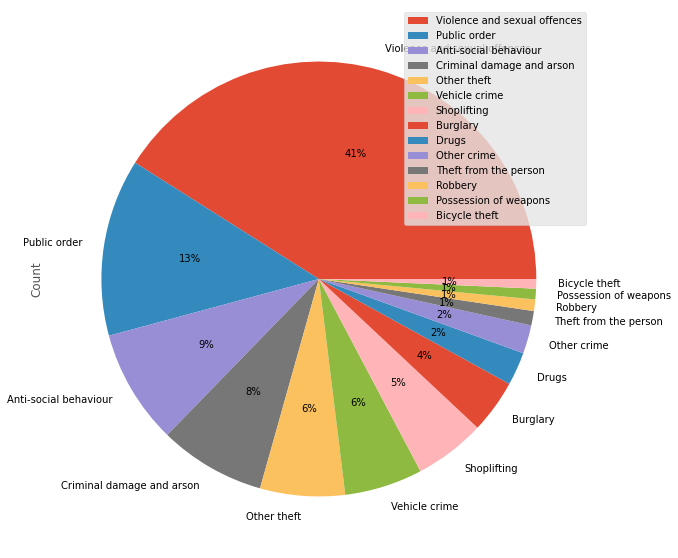

In [69]:
Crime_sum.plot(kind = 'pie',y = 'Count', autopct='%1.0f%%', figsize = (10,10)) #41% of crime is on voilence ans sexual offence

In [8]:
data1[data1.Location == 'No Location'] #497 does not have any location

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
27949,NaN,2022-09,West Yorkshire Police,West Yorkshire Police,NaN,NaN,No Location,NaN,NaN,Anti-social behaviour,NaN
27950,NaN,2022-09,West Yorkshire Police,West Yorkshire Police,NaN,NaN,No Location,NaN,NaN,Anti-social behaviour,NaN
27951,NaN,2022-09,West Yorkshire Police,West Yorkshire Police,NaN,NaN,No Location,NaN,NaN,Anti-social behaviour,NaN
27952,NaN,2022-09,West Yorkshire Police,West Yorkshire Police,NaN,NaN,No Location,NaN,NaN,Anti-social behaviour,NaN
27953,NaN,2022-09,West Yorkshire Police,West Yorkshire Police,NaN,NaN,No Location,NaN,NaN,Anti-social behaviour,NaN
...,...,...,...,...,...,...,...,...,...,...,...
28441,0bb1c24c4719ddca005d4aac47d9cd4d55a0811b7b3029...,2022-09,West Yorkshire Police,West Yorkshire Police,NaN,NaN,No Location,NaN,NaN,Other crime,Under investigation
28442,07b1446f3d5bc5c5f014ba340b30e4cf06f4d4c0bce05c...,2022-09,West Yorkshire Police,West Yorkshire Police,NaN,NaN,No Location,NaN,NaN,Other crime,Under investigation
28443,4166339efa6061e0b70560226359ff821e330fd092b62c...,2022-09,West Yorkshire Police,West Yorkshire Police,NaN,NaN,No Location,NaN,NaN,Other crime,Awaiting court outcome
28444,2269451f6692de106061c14fad64e1d68983038dea7bcb...,2022-09,West Yorkshire Police,West Yorkshire Police,NaN,NaN,No Location,NaN,NaN,Other crime,Under investigation


In [9]:
CrimeLSOA = data1["LSOA name"].value_counts().head(13)

In [10]:
CLSOA = CrimeLSOA.to_frame().reset_index().rename(columns = {'index':'LSOA name', 'LSOA name': 'count'})

<AxesSubplot:xlabel='LSOA name'>

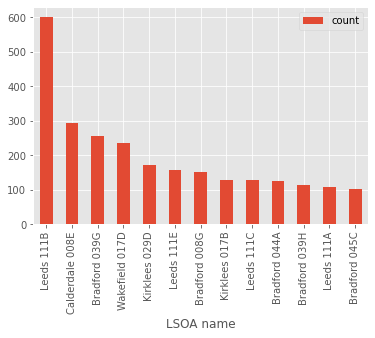

In [11]:
CLSOA.plot.bar(x = 'LSOA name',y = 'count') # Area with more than 100 crimes in month of sep

In [12]:
data1["new LSOA"] = data1["LSOA name"].str.split(expand = True)[0]
dataA = data1['new LSOA'].value_counts().to_frame()
dataA = dataA.rename(columns = {"new LSOA": "count"})

<AxesSubplot:ylabel='count'>

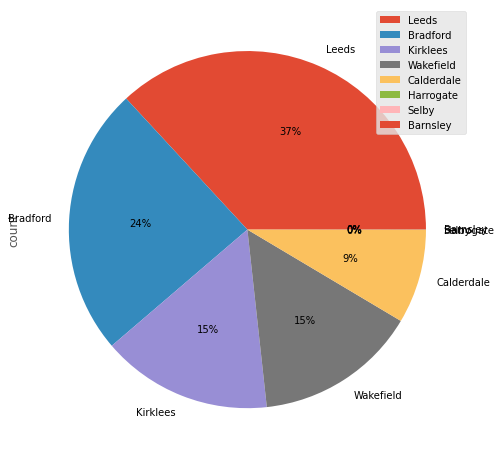

In [13]:
dataA.plot.pie(y = 'count', figsize = (8,10),autopct='%1.0f%%') # Most of the crime is in Leeds  and almost no crime in barnsley,Selby,Harrogate

In [14]:
DataLC = data1.groupby(["new LSOA","Crime type"])

In [15]:
data_LC = DataLC["Crime ID"].count().to_frame()

In [16]:
data_LC.rename(columns = {"Crime ID": "Count"}, inplace = True)

In [17]:
data_LC.head()

Count
new LSOA Crime type                      
Barnsley Public order                   1
Bradford Anti-social behaviour          0
         Bicycle theft                 31
         Burglary                     241
         Criminal damage and arson    541

In [18]:
pivot = pd.pivot_table(data=data_LC, index=['new LSOA'], columns=['Crime type'], values='Count')

In [19]:
pivot.fillna(0, inplace = True)

<AxesSubplot:xlabel='new LSOA'>

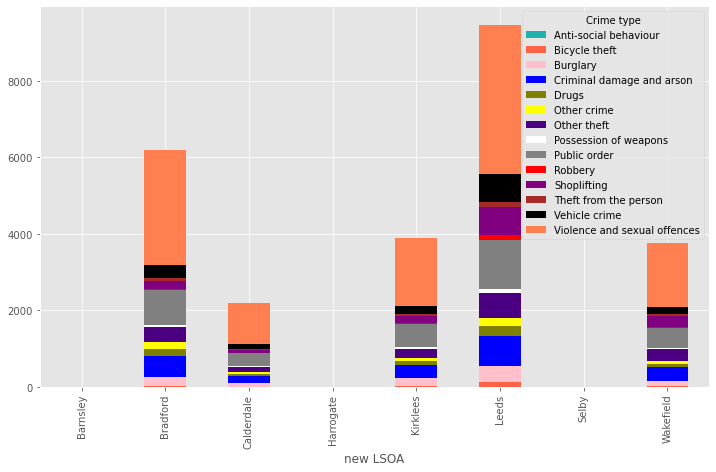

In [20]:
pivot.plot.bar(stacked = True, figsize = (12,7), color =['lightseagreen', 'tomato','pink','blue','olive','yellow','indigo','white','grey','red','purple','brown','black','coral'])

In [21]:
data2 = pd.read_csv(r"D:\R Studio\RStudio\CrimeD\2022-09\2022-09-west-yorkshire-outcomes.csv")

In [22]:
data2O = data2["Outcome type"].value_counts().to_frame()
data2O = data2O.reset_index()

In [23]:
data2O = data2O.rename(columns = {"index":"Outcome","Outcome type":"Count2"})
data2O.head()

,Outcome,Count2
0,Unable to prosecute suspect,13527
1,Investigation complete; no suspect identified,10778
2,Suspect charged,1832
3,Local resolution,601
4,Offender given a caution,279


In [24]:
dataLast = data1["Last outcome category"].value_counts().to_frame().reset_index()

In [25]:
data1O = dataLast.rename(columns = {"index":"Outcome","Last outcome category":"Count1"})

In [26]:
data1O.head()

,Outcome,Count1
0,Under investigation,12647
1,Investigation complete; no suspect identified,7970
2,Unable to prosecute suspect,4696
3,Awaiting court outcome,324
4,Local resolution,204


In [27]:
merged_df1 = pd.merge(data1O,data2O,how='outer',on=['Outcome'])

<AxesSubplot:xlabel='Outcome'>

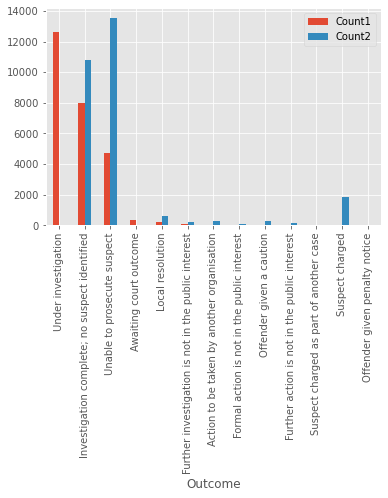

In [28]:
merged_df1[['Count1','Count2']] = merged_df1[['Count1','Count2']].fillna(0)
merged_df1.head()
merged_df1.plot(kind = 'bar', x = 'Outcome', y = ['Count1','Count2']) #count1 is before EOM and count2 is after EOM


In [29]:
data2.info()#data1 has 28446 entries and data2 has 27731 entries, which means that 715 entries are not addresed
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27731 entries, 0 to 27730
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Crime ID      27731 non-null  object 
 1   Month         27731 non-null  object 
 2   Reported by   27731 non-null  object 
 3   Falls within  27731 non-null  object 
 4   Longitude     27196 non-null  float64
 5   Latitude      27196 non-null  float64
 6   Location      27731 non-null  object 
 7   LSOA code     27196 non-null  object 
 8   LSOA name     27196 non-null  object 
 9   Outcome type  27731 non-null  object 
dtypes: float64(2), object(8)
memory usage: 2.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28446 entries, 0 to 28445
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Crime ID               26021 non-null  object 
 1   Month                  28446 non-null  object 
 2   R

In [30]:
data12 = pd.merge(data1, data2, how = 'left', on = 'Crime ID')
data12.columns

Index(['Crime ID', 'Month_x', 'Reported by_x', 'Falls within_x', 'Longitude_x',
       'Latitude_x', 'Location_x', 'LSOA code_x', 'LSOA name_x', 'Crime type',
       'Last outcome category', 'new LSOA', 'Month_y', 'Reported by_y',
       'Falls within_y', 'Longitude_y', 'Latitude_y', 'Location_y',
       'LSOA code_y', 'LSOA name_y', 'Outcome type'],
      dtype='object')

In [31]:
data12.drop(['Month_y','Reported by_y','Falls within_y','Longitude_y','Latitude_y','Location_y','LSOA code_y','LSOA name_y'], axis = 1, inplace = True)

In [32]:
data12.drop(['Reported by_x', 'Falls within_x', 'Longitude_x', 'Latitude_x', 'Location_x', 'LSOA code_x'], axis = 1, inplace = True)

In [33]:
data12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28489 entries, 0 to 28488
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Crime ID               26064 non-null  object
 1   Month_x                28489 non-null  object
 2   LSOA name_x            27990 non-null  object
 3   Crime type             28489 non-null  object
 4   Last outcome category  26064 non-null  object
 5   new LSOA               27990 non-null  object
 6   Outcome type           13417 non-null  object
dtypes: object(7)
memory usage: 1.7+ MB


<AxesSubplot:>

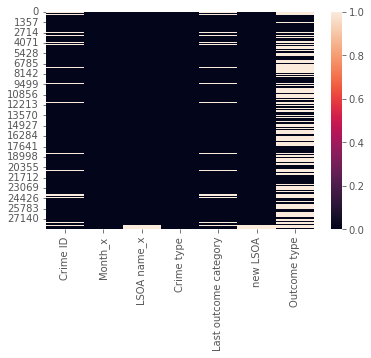

In [34]:
sns.heatmap(data12.isnull()) # shows that there are null values in crime id, last outcome category and most in Outcome type

In [35]:
data12["Outcome type"].value_counts()

Investigation complete; no suspect identified          7970
Unable to prosecute suspect                            4698
Suspect charged                                         352
Local resolution                                        215
Further investigation is not in the public interest      85
Action to be taken by another organisation               41
Formal action is not in the public interest              20
Offender given a caution                                 19
Further action is not in the public interest             13
Suspect charged as part of another case                   4
Name: Outcome type, dtype: int64

In [36]:
dtemp1 = data12.groupby(["Crime type","Outcome type"])

In [37]:
dtemp = dtemp1['Crime ID'].count().to_frame().reset_index()

In [38]:
dtemp.rename(columns = {"Crime ID": "Count"}, inplace = True)

In [39]:
dtemp = dtemp.sort_values(by = "Count", ascending = False)

In [40]:
pivot2 = pd.pivot_table(data=dtemp, index=['Outcome type'], columns=['Crime type'], values='Count')

<AxesSubplot:xlabel='Outcome type'>

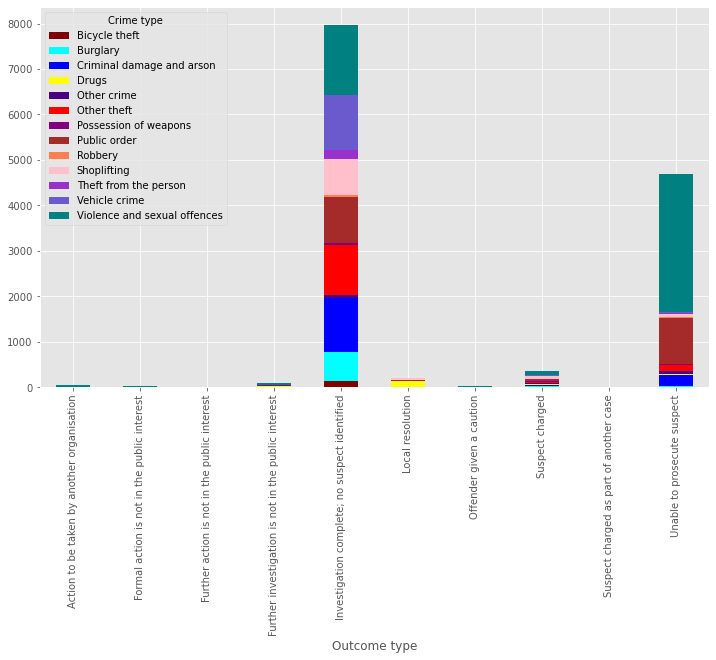

In [41]:
pivot2.fillna(0, inplace = True)
pivot2.plot.bar(stacked = True, figsize = (12,7), color =['maroon','cyan','blue','yellow','indigo','red','purple','brown','coral','pink','darkorchid','slateblue','teal'])
# graph shows that most of the crimes outcome is investigation complete with no suspect identified and police is unable to prosecute suspect for most of thevoice case

In [42]:
data12 = data12.dropna(subset = ['Crime ID']) # dropping all the rows for which Crime ID is null

In [43]:
data12["Outcome type"].isna().sum()

12647

In [44]:
OutcomeN = data12[data12["Outcome type"].isna()] # stroring data for which outcome is null and 12647 cases has no outcome

<AxesSubplot:xlabel='Crime type'>

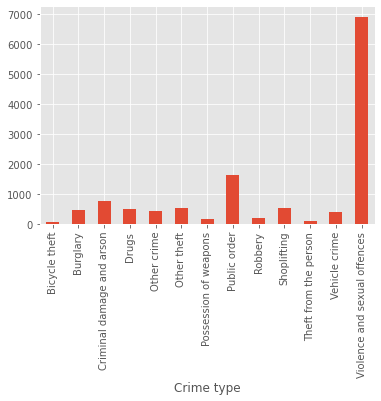

In [45]:
OutcomeN.groupby("Crime type")["Last outcome category"].count().plot.bar() #shows that more than half of those cases for which no justification provided involved 'voilence n sexual offence cases'

In [46]:
data12.head()

,Crime ID,Month_x,LSOA name_x,Crime type,Last outcome category,new LSOA,Outcome type
0,919dd34a574601f84cb0e869ecf91d092f20e54798812c...,2022-09,Barnsley 005C,Public order,Investigation complete; no suspect identified,Barnsley,Investigation complete; no suspect identified
1,6955d53f81c26ae2dc663284114b4637387fc844ae4232...,2022-09,Bradford 001A,Criminal damage and arson,Investigation complete; no suspect identified,Bradford,Investigation complete; no suspect identified
2,9de0f9a8ba93635e46e4463e983cc666f777099fc50851...,2022-09,Bradford 001A,Other theft,Under investigation,Bradford,NaN
3,f5b4e4648b04c56e90f98650d7917b19d3a39341c985e2...,2022-09,Bradford 001A,Other theft,Under investigation,Bradford,NaN
4,237600ff55d97f128a6ba8547eba9641bbde1496beee1e...,2022-09,Bradford 001A,Public order,Under investigation,Bradford,NaN


In [47]:
#plot = df.plot.pie(subplots=True, figsize=(6, 4))
#df = pd.DataFrame({'mass': [2.87, 5.97, 6.00],
                  #'radius': [6051.8, 6378.1, 71492]},
                  #index=['Venus', 'Earth', 'Jupiter'])
#plot = df.plot.pie(y='mass', figsize=(5, 5))

In [48]:
data12['Outcome type'].fillna(0,inplace = True)
dataLOC = data12.groupby(['new LSOA','Outcome type'])

C:\Users\dell\AppData\Local\Temp\ipykernel_26816\1276487351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data12['Outcome type'].fillna(0,inplace = True)


In [49]:
dataLOC = dataLOC['Crime ID'].count().to_frame()

In [50]:
dataLOC.rename(columns = {"Crime ID":"Count"}, inplace = True)

In [51]:
pivot3 = pd.pivot_table(data=dataLOC, index=['new LSOA'], columns=['Outcome type'], values='Count')

In [52]:
pivot3.fillna(0, inplace = True)

<AxesSubplot:xlabel='new LSOA'>

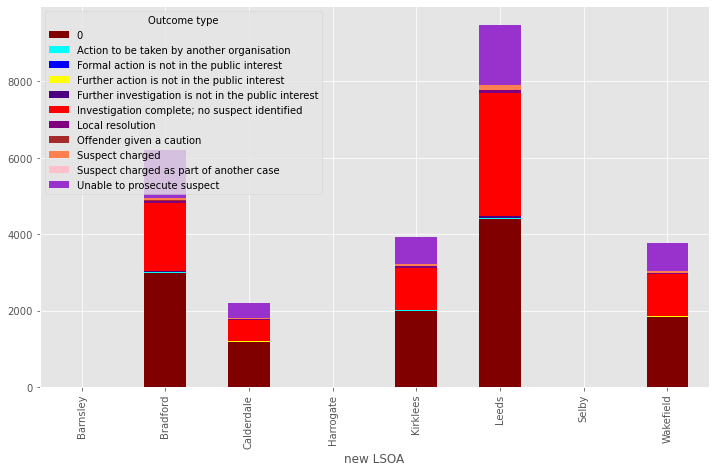

In [53]:
pivot3.plot.bar(stacked = True, figsize = (12,7), color =['maroon','cyan','blue','yellow','indigo','red','purple','brown','coral','pink','darkorchid','slateblue','teal'])

In [54]:
data1[data1["Crime ID"].isna()]["new LSOA"].value_counts() #most of the null value of crime id is from Leeds but proportion of leeds n Bradford  n Wakefield which is 8%

Leeds         833
Bradford      611
Kirklees      418
Wakefield     345
Calderdale    192
Harrogate       2
Name: new LSOA, dtype: int64

In [55]:
data1["new LSOA"].value_counts() #crimid null for Kirklees is 9%,8% Calderdale, 4% for Harrogate n 0% for selby n bernsley

Leeds         10308
Bradford       6817
Kirklees       4322
Wakefield      4114
Calderdale     2379
Harrogate         5
Selby             3
Barnsley          1
Name: new LSOA, dtype: int64

In [56]:
dataSimi = data12[data12["Last outcome category"] == data12["Outcome type"]]

In [57]:
dataSimi["Outcome type"].value_counts()

Investigation complete; no suspect identified          7970
Unable to prosecute suspect                            4698
Local resolution                                        213
Further investigation is not in the public interest      85
Action to be taken by another organisation               41
Formal action is not in the public interest              20
Offender given a caution                                 19
Further action is not in the public interest             13
Suspect charged as part of another case                   4
Name: Outcome type, dtype: int64

In [58]:
data1['Last outcome category'].value_counts() # shows that there is no chnage in value of 'last outcome cat' n 'outcome type' for
                                              #Investigation complete; no suspect identified,Unable to prosecute suspect,
                                             #Further investigation is not in the public interest,Action to be taken by another organisation 
                                            #Formal action is not in the public interest,Offender given a caution

Under investigation                                    12647
Investigation complete; no suspect identified           7970
Unable to prosecute suspect                             4696
Awaiting court outcome                                   324
Local resolution                                         204
Further investigation is not in the public interest       85
Action to be taken by another organisation                41
Formal action is not in the public interest               20
Offender given a caution                                  19
Further action is not in the public interest              13
Suspect charged as part of another case                    2
Name: Last outcome category, dtype: int64

In [59]:
dataCourtA = data12[data12["Last outcome category"] =="Awaiting court outcome"]

In [60]:
dataCourtA["Outcome type"].value_counts() #shows that the last outcome with "awaiting court outcome" chnage to "Suspect charged"

Suspect charged    350
Name: Outcome type, dtype: int64

In [61]:
dataNSimi = data12[data12["Last outcome category"] != data12["Outcome type"]] # not similar data

In [62]:
dataNSimi["Last outcome category"].value_counts() # shows that almost all "under investigation" outcome is chnaged

Under investigation                              12647
Awaiting court outcome                             350
Investigation complete; no suspect identified        4
Name: Last outcome category, dtype: int64

In [63]:
data_U_I = dataNSimi[dataNSimi["Last outcome category"] == "Under investigation"]

In [64]:
data_U_I["Outcome type"].value_counts() # shows that all the "Under investigation" outcome before month end has no value/0/null in "Outcome type"
                                        # and there are 12647 crimes with no outcome in the end of the month

0    12647
Name: Outcome type, dtype: int64